In [18]:
from sklearn import svm

In [19]:
svc = svm.SVC(kernel='linear')

In [20]:
from sklearn import datasets

In [21]:
iris=datasets.load_iris()

In [37]:
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
X = X[y != 0, :3]

In [46]:
y=y[y!=0]
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
import matplotlib.pyplot as plt 

In [49]:
plt.figure()

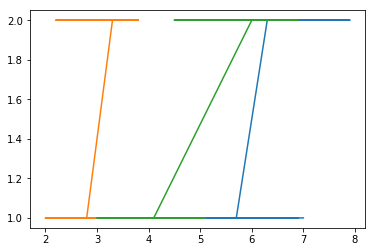

In [50]:
plt.plot(X, y)

In [53]:
a=svc.predict(X[y==1,:3])
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [55]:
# Model selection:
from sklearn import datasets, svm

In [57]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [59]:
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [62]:
import numpy as np
#split array as n subarray
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()

In [63]:
for k in range(3):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))

In [64]:
print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


In [79]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=5)

In [80]:
for train_indices, test_indices in k_fold.split(X):
    print("train_indices{}, test_indices{}".format(train_indices, test_indices))

train_indices[2 3 4 5], test_indices[0 1]
train_indices[0 1 3 4 5], test_indices[2]
train_indices[0 1 2 4 5], test_indices[3]
train_indices[0 1 2 3 5], test_indices[4]
train_indices[0 1 2 3 4], test_indices[5]


In [84]:
[svc.fit(X_digits[train],y_digits[train]).score(X_digits[test],y_digits[test]) for train,test in KFold(n_splits=3).split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [85]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score>